<a href="https://colab.research.google.com/github/Thoyyi01/AD_project/blob/main/Insurance_claim_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df=pd.read_csv('/content/Claimants_Data.csv')

In [ ]:
df.shape

(100156, 13)

<h3>Finding Null values</h3>

In [ ]:
df.isnull().sum()

,0
CASENUM,0
ATTORNEY,0
CLMSEX,0
CLMINSUR,0
SEATBELT,0
CLMAGE,0
LOSS,0
Accident_Severity,0
Claim_Amount_Requested,0
Claim_Approval_Status,0


<h3>here we removing the rows where Age is 0 years</h3>

In [ ]:
df["CLMAGE"].replace(0,df[df["CLMAGE"]>0]["CLMAGE"].median(),inplace=True)

<ipython-input-42-d6136c572a84>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CLMAGE"].replace(0,df[df["CLMAGE"]>0]["CLMAGE"].median(),inplace=True)


In [ ]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,1,1,1.0,1.0,0.0,48,8502.60,Moderate,13062.60,1,10398.38,Comprehensive,Minor Offenses
1,2,0,1.0,0.0,1.0,19,2464.30,Moderate,4249.17,1,16550.01,Comprehensive,Clean
2,3,1,0.0,0.0,1.0,69,15647.05,Severe,7401.16,0,18019.31,Third-Party,Minor Offenses
3,4,1,0.0,0.0,1.0,34,9309.79,Moderate,1034.25,0,6826.58,Comprehensive,Minor Offenses
4,5,1,1.0,1.0,0.0,2,663.94,Severe,12654.29,0,18463.96,Third-Party,Minor Offenses


In [ ]:
df.groupby('Driving_Record')['ATTORNEY'].mean()

,ATTORNEY
Driving_Record,
Clean,0.502351
Major Offenses,0.499850
Minor Offenses,0.498949


In [ ]:
df.groupby('Policy_Type')['ATTORNEY'].mean()

,ATTORNEY
Policy_Type,
Comprehensive,0.503165
Third-Party,0.497539


In [ ]:
df.groupby("Accident_Severity")["ATTORNEY"].mean()

,ATTORNEY
Accident_Severity,
Minor,0.497907
Moderate,0.500791
Severe,0.502393


<h3>Here we need to Label encode the Accident, policy_Type and Driving Records</h3>

In [ ]:
label=LabelEncoder()
df['Accident_Severity']=label.fit_transform(df['Accident_Severity'])
df['Driving_Record']=label.fit_transform(df['Driving_Record'])
df['Policy_Type']=label.fit_transform(df['Policy_Type'])
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,1,1,1.0,1.0,0.0,48,8502.60,1,13062.60,1,10398.38,0,2
1,2,0,1.0,0.0,1.0,19,2464.30,1,4249.17,1,16550.01,0,0
2,3,1,0.0,0.0,1.0,69,15647.05,2,7401.16,0,18019.31,1,2
3,4,1,0.0,0.0,1.0,34,9309.79,1,1034.25,0,6826.58,0,2
4,5,1,1.0,1.0,0.0,2,663.94,2,12654.29,0,18463.96,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100151,100152,0,1.0,1.0,1.0,88,4998.43,2,10673.92,1,8921.29,0,2
100152,100153,0,1.0,1.0,1.0,89,9925.55,1,6345.22,1,18418.60,1,0
100153,100154,1,0.0,1.0,1.0,4,8314.99,2,9233.50,1,10453.20,1,1
100154,100155,0,0.0,0.0,0.0,50,3302.68,1,1489.38,1,1825.65,1,2


<h3>Here we Scaling The Data</h3>

In [ ]:
scaler = StandardScaler()

In [ ]:
cols_to_scale = df.columns.difference(['CASENUM', 'ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT'])
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df.head()


,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,1,1,1.0,1.0,0.0,0.018635,0.103870,-0.002754,0.501756,1.002179,0.075005,-0.993849,1.215003
1,2,0,1.0,0.0,1.0,-1.057292,-1.245499,-0.002754,-1.071469,1.002179,1.187638,-0.993849,-1.235062
2,3,1,0.0,0.0,1.0,0.797754,1.700429,1.223131,-0.508829,-0.997826,1.453387,1.006190,1.215003
3,4,1,0.0,0.0,1.0,-0.500778,0.284251,-0.002754,-1.645343,-0.997826,-0.571018,-0.993849,1.215003
4,5,1,1.0,1.0,0.0,-1.688008,-1.647823,1.223131,0.428871,-0.997826,1.533810,1.006190,1.215003


<h3>Here we converted from String to numbers And we need To Find outliers in Claim_Amount_Requested  </h3>

In [ ]:
Q1 = df['Settlement_Amount'].quantile(0.25)
Q3 = df['Settlement_Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers2 = df[(df['Settlement_Amount'] < lower_bound)]
outliers2

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


In [ ]:
Q1 = df['Claim_Amount_Requested'].quantile(0.25)
Q3 = df['Claim_Amount_Requested'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Claim_Amount_Requested'] < lower_bound)]
outliers

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


In [ ]:
Q1 = df['CLMAGE'].quantile(0.25)
Q3 = df['CLMAGE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['CLMAGE'] < lower_bound)]
outliers

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


In [ ]:
Q1 = df['LOSS'].quantile(0.25)
Q3 = df['LOSS'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['LOSS'] < lower_bound)]
outliers

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


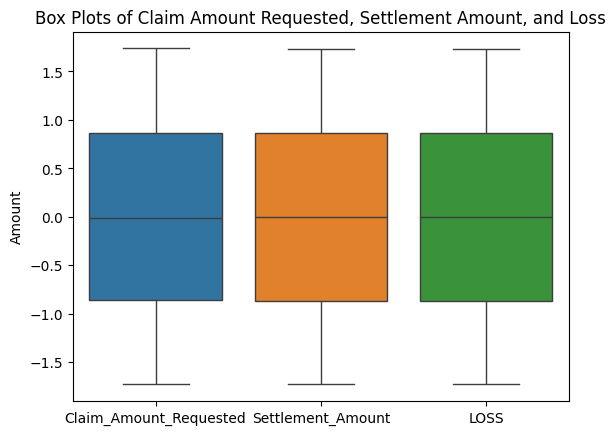

In [ ]:
sns.boxplot(data=df[['Claim_Amount_Requested', 'Settlement_Amount', 'LOSS']])
plt.title('Box Plots of Claim Amount Requested, Settlement Amount, and Loss')
plt.ylabel('Amount')
plt.show()

<h3> Here we Don't have any outliers here</h3>

###To Find corealation we are using heatmap


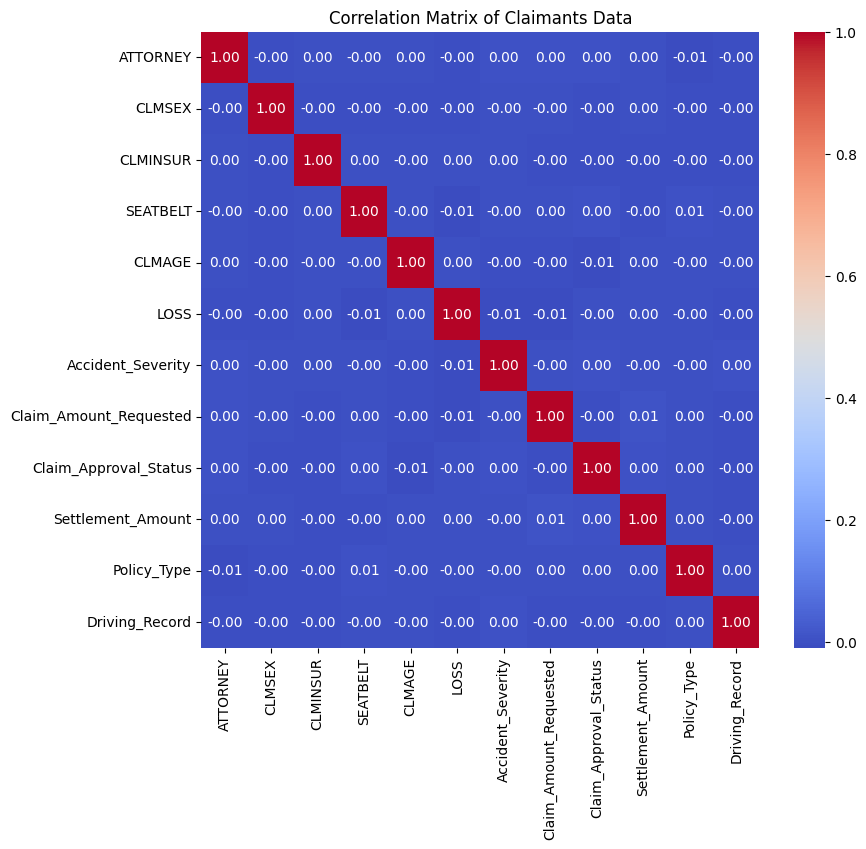

In [ ]:
DATA = df.drop('CASENUM',axis=1)
plt.figure(figsize=(9, 8))
sns.heatmap(DATA.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Claimants Data')
plt.show()

###Checking Accuracy with logistic Regression

In [ ]:

X = df.drop(['ATTORNEY', 'CASENUM'], axis=1)
y = df['ATTORNEY'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
conf_matrix


Accuracy: 0.5028953674121406
              precision    recall  f1-score   support

           0       0.50      0.47      0.48     10025
           1       0.50      0.54      0.52     10007

    accuracy                           0.50     20032
   macro avg       0.50      0.50      0.50     20032
weighted avg       0.50      0.50      0.50     20032

Confusion Matrix:


array([[4678, 5347],
       [4611, 5396]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

print(classification_report(y_test, y_pred_dt))

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:")
conf_matrix_dt


Decision Tree Accuracy: 0.49940095846645366
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     10025
           1       0.50      0.50      0.50     10007

    accuracy                           0.50     20032
   macro avg       0.50      0.50      0.50     20032
weighted avg       0.50      0.50      0.50     20032

Decision Tree Confusion Matrix:


array([[4978, 5047],
       [4981, 5026]])

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5) # Select top 5 features

rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

logreg_rfe = LogisticRegression()
logreg_rfe.fit(X_train_rfe, y_train)

y_pred_rfe = logreg_rfe.predict(X_test_rfe)

accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print(f"Accuracy with RFE: {accuracy_rfe}")
print(classification_report(y_test, y_pred_rfe))
conf_matrix_rfe = confusion_matrix(y_test, y_pred_rfe)
print("Confusion Matrix with RFE:")
conf_matrix_rfe


Selected features: Index(['CLMSEX', 'CLMAGE', 'Accident_Severity', 'Claim_Amount_Requested',
       'Policy_Type'],
      dtype='object')
Accuracy with RFE: 0.5003993610223643
              precision    recall  f1-score   support

           0       0.50      0.46      0.48     10025
           1       0.50      0.54      0.52     10007

    accuracy                           0.50     20032
   macro avg       0.50      0.50      0.50     20032
weighted avg       0.50      0.50      0.50     20032

Confusion Matrix with RFE:


array([[4578, 5447],
       [4561, 5446]])